<a href="https://colab.research.google.com/github/guido-niku/fast-ai-Pet-Breed/blob/main/Pet_Breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 194kB 16.5MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 1.2MB 23.4MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *
from fastai.callback.fp16 import *

# Pet Breeds

In [4]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path


(#7393) [Path('images/scottish_terrier_38.jpg'),Path('images/British_Shorthair_165.jpg'),Path('images/american_pit_bull_terrier_200.jpg'),Path('images/chihuahua_21.jpg'),Path('images/Maine_Coon_56.jpg'),Path('images/beagle_13.jpg'),Path('images/newfoundland_81.jpg'),Path('images/english_cocker_spaniel_151.jpg'),Path('images/samoyed_162.jpg'),Path('images/Birman_142.jpg')...]

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

# Sanity Check

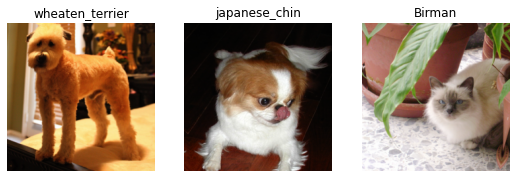

In [7]:
dls.show_batch(nrows=1, ncols=3)

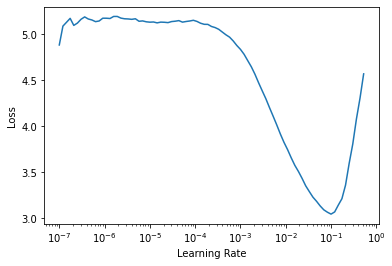

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [15]:
print("min:",lr_min)
print("Steep:",lr_steep)
learn.fine_tune??

min: 0.010000000149011612
Steep: 0.004365158267319202


run - freeze - update LR - run - rinse and repeat

In [ ]:
learn.fine_tune(8,base_lr =(lr_min+lr_steep)/2.) #divides by 2 the base_lr

In [25]:
lr = lr_min+lr_steep/2.
learn.fit_one_cycle(3, lr) #we manually handle things

epoch,train_loss,valid_loss,error_rate,time
0,1.107615,1.531189,0.358593,01:07
1,0.921382,0.478845,0.133288,01:07
2,0.532113,0.268955,0.079838,01:07


SuggestedLRs(lr_min=5.754399353463669e-07, lr_steep=7.585775847473997e-07)

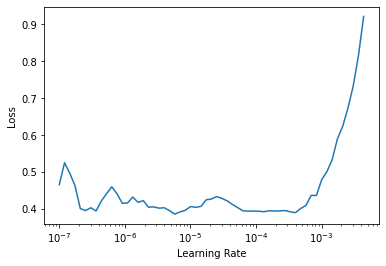

In [26]:
learn.unfreeze()
learn.lr_find()

In [27]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.356026,0.252728,0.079161,01:13
1,0.341855,0.245716,0.078484,01:13
2,0.334874,0.234338,0.073072,01:12
3,0.306235,0.232196,0.077808,01:12
4,0.282311,0.225713,0.077131,01:12
5,0.270279,0.227957,0.077808,01:12


In [ ]:
#TODO : lr_max = slice ??

# pretty neat !
Saving it just in case 

In [28]:
learn.export()

# MULTI-category

In [30]:
df = pd.read_csv(path/'train.csv')
path = untar_data(URLs.PASCAL_2007)

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

